#Assignment 4 -  Hidden Markov Models Exercise
\
Ana Araújo, nº 59457\
Pedro Almeida, nº 58844

**Exercise: Dishonest Casino Problem**

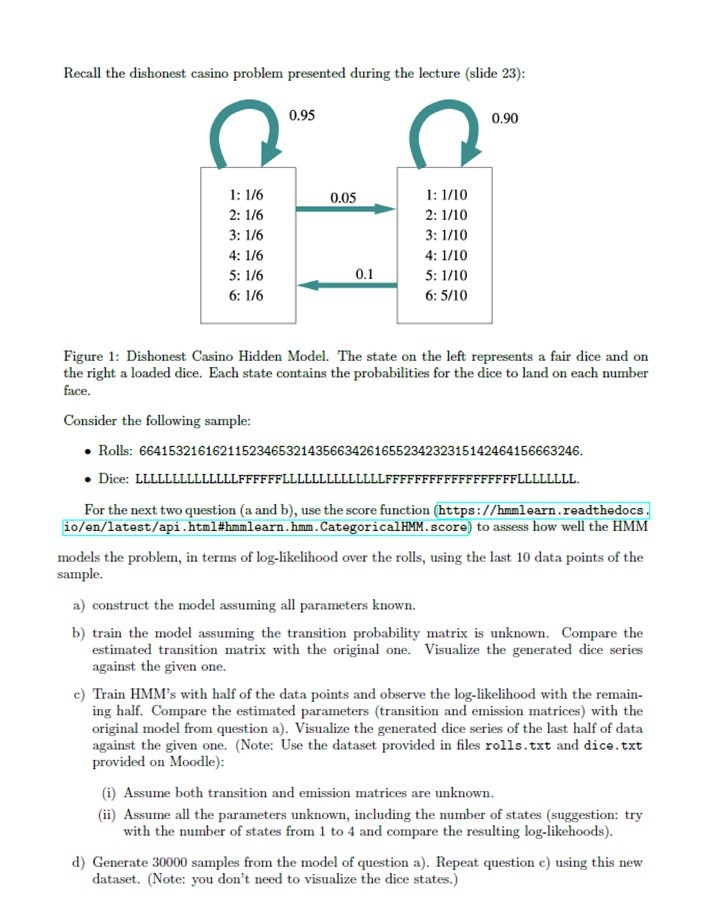

**Resolution**

In [2]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt


Note: for the casino we can not use the gaussian because the probability in this case is not continuos.

#### a)

In [3]:
X = '664153216162115234653214356634261655234232315142464156663246'
X = np.array([[int(i)] for i in X])-1

state = 'LLLLLLLLLLLLLLFFFFFFLLLLLLLLLLLLLLFFFFFFFFFFFFFFFFFFLLLLLLLL'
states = []
for i in range(len(state)):
    if state[i] == "L":
        states.append(int(1))
    else:
        states.append(int(0))

gen_model = hmm.CategoricalHMM(n_components=2, random_state=99)

pi1 = ((.1)/(0.05+.1))
pi2 = ((0.05)/(0.05+0.1))

gen_model.n_features = 6

gen_model.startprob_ = np.array([pi1,pi2])

gen_model.transmat_ = np.array([[0.95, 0.05],
                                [0.1, 0.9]])

gen_model.emissionprob_ = \
    np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6],
              [1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 10, 5/ 10]])



rolls, gen_states = gen_model.sample(60)
states = np.array(states)
states = states.astype(dtype=int)
gen_model.score(X[-10:])

-16.98461390418157

The negative log-likelihood obtained (-16.98) indicates that the HMM with known parameters is not a very good fit for the observed data. In general, a higher log-likelihood value indicates a better fit between the model and the data.

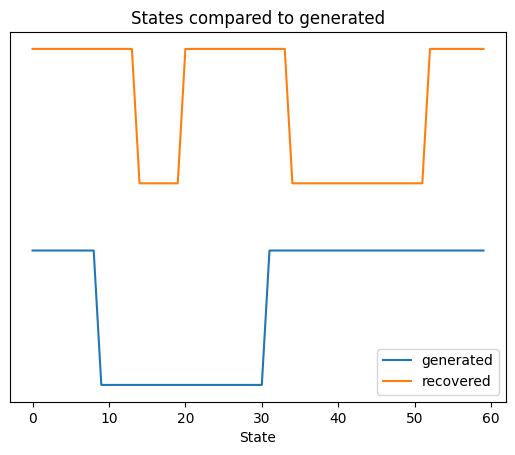

In [4]:
fig, ax = plt.subplots()
ax.plot(gen_states, label='generated')
ax.plot(states + 1.5, label='recovered')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

#### b)

In [5]:
X_train = X[:-10]
X_validate = X[-10:]

# check optimal score
gen_score = gen_model.score(X_validate)

best_score = best_model = None
n_fits = 50
np.random.seed(13)
for idx in range(n_fits):
    model = hmm.CategoricalHMM(
        n_components=2, random_state=idx,
        init_params='t', n_iter=1000, tol=0.001)
    #tol it will look to log liklihood, the log probability will be compared with the previous one
    # when it reaches this value it will stop
    model.startprob_ = np.array([pi1,pi2])

    model.emissionprob_ = \
    np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6],
              [1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 10, 5/ 10]])

    model.n_features = 6


    model.fit(X_train)
    score = model.score(X_validate)
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

print(f'Generated score: {gen_score}\nBest score:      {best_score}')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
rolls, gen_states = model.sample(len(X_validate))
states = best_model.predict(X_validate)

Generated score: -16.98461390418157
Best score:      -17.400957264319366


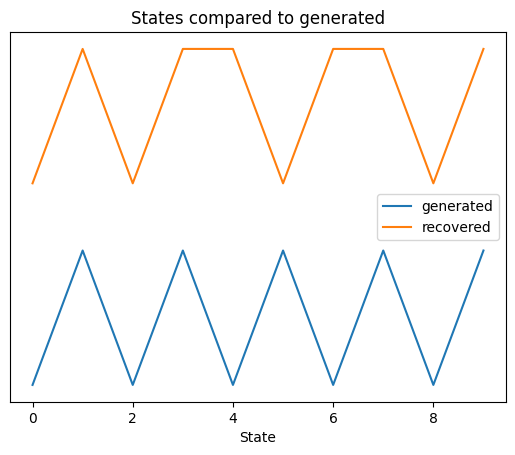

In [6]:
fig, ax = plt.subplots()
ax.plot(gen_states, label='generated')
ax.plot(states + 1.5, label='recovered')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

In [7]:
print(f'Transmission Matrix Generated:\n{gen_model.transmat_.round(3)}\n\n'
      f'Transmission Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[0.    1.   ]
 [0.778 0.222]]




The generated series is not very similar to the actual one. However, since we only trained the model on the first 50 data points, the model may not have had enough information to accurately predict the last 10 points. If we had more data, we could increase the model's performance.

for d) we use the model a) to generate the samples

### c) There are 1100 rolls

In [ ]:
with open('rolls.txt') as f:
    roll_lines = f.readlines()

rolls = np.array([[int(i.strip('\n'))] for i in roll_lines])-1

with open('dice.txt') as f:
    dice_lines = f.readlines()

dice = [[i.strip('\n')] for i in dice_lines]

### i)

In [10]:
X_train = rolls[:550]
X_validate = rolls[550:]

# check optimal score
gen_score = gen_model.score(X_validate)

best_score = best_model = None
n_fits = 50
for idx in range(n_fits):
    model = hmm.CategoricalHMM(
        n_components=2, random_state=idx,
        init_params='te', n_iter=1000, tol=0.001)
    #tol it will look to log liklihood, the log probability will be compared with the previous one
    # when it reaches this value it will stop
    model.startprob_ = np.array([pi1,pi2])


    model.n_features = 6


    model.fit(X_train)
    score = model.score(X_validate)
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

print(f'Generated score: {gen_score}\nBest score:      {best_score}')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = best_model.predict(X_validate)
rolls, gen_states = model.sample(len(X_validate))

Generated score: -961.6460620989014
Best score:      -961.9920239058392


In [11]:
print(f'Transmission Matrix Generated:\n{gen_model.transmat_.round(3)}\n\n'
      f'Transmission Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[0.967 0.033]
 [0.023 0.977]]




The best score obtained is -961.99, while the score obtained from the generated sequence using the generated model is -961.64, indicating that the generated model can decently capture the underlying distribution of the data.

The generated transition matrix is different from the original one. The genrerated matrix shows that the probability of transitioning from the fair dice to the loaded dice is 0.033, while the probability of transitioning from the loaded dice to the fair dice is 0.023. These values suggest that the loaded dice is more likely to persist.


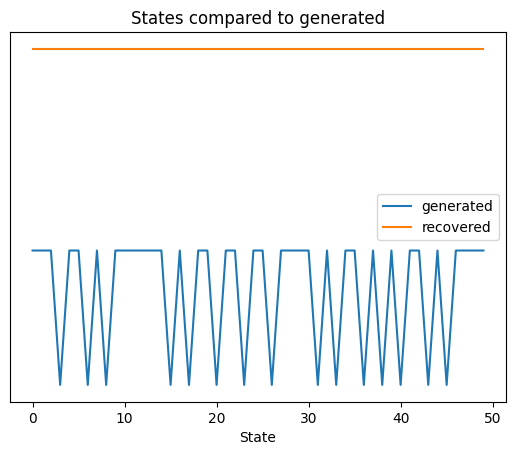

In [12]:
fig, ax = plt.subplots()
ax.plot(gen_states[:50], label='generated')
ax.plot(states[:50] + 1.5, label='recovered')
ax.set_yticks([])
ax.set_title('States compared to generated')
ax.set_xlabel('Time (# rolls)')
ax.set_xlabel('State')
ax.legend()
fig.show()

### ii)

In [13]:
best_score = best_model = None
n_fits = 50
for i in range(1,5):
    for idx in range(n_fits):
        model = hmm.CategoricalHMM(
            n_components=i, random_state=idx,
            init_params='ste', n_iter=1000, tol=0.001)
        #tol it will look to log liklihood, the log probability will be compared with the previous one
        # when it reaches this value it will stop

        model.n_features = 6


        model.fit(X_train)
        score = model.score(X_validate)
        if best_score is None or score > best_score:
            best_model = model
            best_score = score
    print('For number of states = ',i)
    print(f'Generated score: {gen_score}\nBest score:      {best_score}')
    print()
    # use the Viterbi algorithm to predict the most likely sequence of states
    # given the model
    states = best_model.predict(X_validate)

    print(f'Transmission Matrix Generated:\n{gen_model.transmat_.round(3)}\n\n'
      f'Transmission Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')

For number of states =  1
Generated score: -961.6460620989014
Best score:      -969.3308570167919

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[1.]]


For number of states =  2
Generated score: -961.6460620989014
Best score:      -961.9622986704364

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[0.967 0.033]
 [0.022 0.978]]


For number of states =  3
Generated score: -961.6460620989014
Best score:      -960.6571677843937

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[0.96  0.    0.04 ]
 [0.032 0.793 0.174]
 [0.001 0.825 0.174]]


For number of states =  4
Generated score: -961.6460620989014
Best score:      -960.6571677843937

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[0.96  0.    0.04 ]
 [0.032 0.793 0.174]
 [0.001 0.825 0.174]]




### d)

### i)

In [14]:
X, Z = gen_model.sample(30000)

In [15]:
X_train = X[:15000]
X_validate = X[15000:]

# check optimal score
gen_score = gen_model.score(X_validate)

best_score = best_model = None
n_fits = 50
for idx in range(n_fits):
    model = hmm.CategoricalHMM(
        n_components=2, random_state=idx,
        init_params='t', n_iter=1000, tol=0.001)
    #tol it will look to log liklihood, the log probability will be compared with the previous one
    # when it reaches this value it will stop
    model.startprob_ = np.array([pi1,pi2])


    model.n_features = 6

    model.emissionprob_ = \
    np.array([[1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6, 1 / 6],
              [1 / 10, 1 / 10, 1 / 10, 1 / 10, 1 / 10, 5/ 10]])


    model.fit(X_train)
    score = model.score(X_validate)
    if best_score is None or score > best_score:
        best_model = model
        best_score = score

print(f'Generated score: {gen_score}\nBest score:      {best_score}')

# use the Viterbi algorithm to predict the most likely sequence of states
# given the model
states = best_model.predict(X_validate)

print(f'Transmission Matrix Generated:\n{gen_model.transmat_.round(3)}\n\n'
      f'Transmission Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')

Generated score: -26230.877410119025
Best score:      -26229.288251699847
Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[0.948 0.052]
 [0.095 0.905]]




### ii)

In [16]:
best_score = best_model = None
n_fits = 50
for i in range(1,5):
    for idx in range(n_fits):
        model = hmm.CategoricalHMM(
            n_components=i, random_state=idx,
            init_params='ste', n_iter=1000, tol=0.001)
        #tol it will look to log liklihood, the log probability will be compared with the previous one
        # when it reaches this value it will stop

        model.n_features = 6


        model.fit(X_train)
        score = model.score(X_validate)
        if best_score is None or score > best_score:
            best_model = model
            best_score = score
    print('For number of states = ',i)
    print(f'Generated score: {gen_score}\nBest score:      {best_score}')
    print()
    # use the Viterbi algorithm to predict the most likely sequence of states
    # given the model
    states = best_model.predict(X_validate)

    print(f'Transmission Matrix Generated:\n{gen_model.transmat_.round(3)}\n\n'
      f'Transmission Matrix Recovered:\n{best_model.transmat_.round(3)}\n\n')

For number of states =  1
Generated score: -26230.877410119025
Best score:      -26395.622357831373

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[1.]]


For number of states =  2
Generated score: -26230.877410119025
Best score:      -26229.288572313708

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[0.948 0.052]
 [0.095 0.905]]


For number of states =  3
Generated score: -26230.877410119025
Best score:      -26228.653292062107

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[0.591 0.076 0.333]
 [0.    0.946 0.054]
 [0.848 0.147 0.006]]


For number of states =  4
Generated score: -26230.877410119025
Best score:      -26228.653292062107

Transmission Matrix Generated:
[[0.95 0.05]
 [0.1  0.9 ]]

Transmission Matrix Recovered:
[[0.591 0.076 0.333]
 [0.    0.946 0.054]
 [0.848 0.147 0.006]]




The results show the log-likelihood scores and generated transmission matrices.

For the case of one hidden state, the generated score is -961.65 and the best score is -969.33. The generated transmission matrix is 1, indicating that the model assumes the dice to always be fair.

For two hidden states, the generated score is the same as before, but the best score improved to -961.96. The generated transmission matrix indicates nthat the model has learned that the dice can be either fair or loaded, with a higher probability of transitioning from loaded to fair than the other way around.

The best score for three hidden states improved to -960.65. The generated transmission matrix shows that the model has learned that the dice can be fair, with higher probabilities of transitioning from loaded to fair or from heavily loaded to slightly loaded, and lower probabilities of transitioning from loaded to fair or from slightly loaded to heavily loaded.

For four hidden states, the results are the same as for three hidden states, since the best score did not improve any further.